In [1]:
from plotting import load_results_df, get_metrics, plot_perf, plot_single_metric, create_corr_df
import re
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
sns.set()

perf_df, metrics_df = load_results_df(metric_sweep_names=[
                     'uv2kvsoa'], transfer_sweep_names=['z85e3el7'])
metrics = get_metrics(metrics_df)

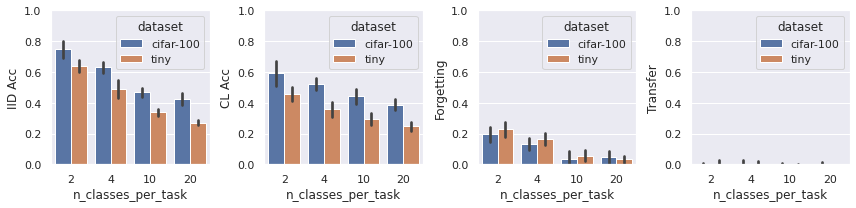

In [2]:
plot_perf(perf_df, hue='dataset', x='n_classes_per_task', figsize=(12, 3), savefig='../figures/perf.png') 

In [ ]:
for m in metrics:
    metrics_df[m] = (metrics_df[m] - metrics_df[m].min()) / \
        (metrics_df[m].max() - metrics_df[m].min())
    plot_single_metric(df=metrics_df, x=m, y='all_fgts', **dict(xlabel=m,
                 ylabel='Forgetting'), savefig='../figures/fgt_scatter.png')
    plot_single_metric(df=metrics_df, x=m, y='all_cl_accs', **dict(xlabel=m,
                 ylabel='CL Accuracy'), savefig='../figures/acc_scatter.png')
    # plot_single_metric(df=metrics_df, x=m, y='all_transfers', **dict(xlabel=m, ylabel='Transfer'), savefig='../figures/transfer_scatter.png')


In [3]:
corr_df = create_corr_df(metrics_df.copy(), metrics, idx=True)
corr_df.to_csv('corr_df.csv')